# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [12]:
dataset = pd.read_csv('Ads_CTR_Optimisation (2).csv')

## Implementing UCB

In [18]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if number_of_selections[i] > 0 :
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
      upper_bound = average_reward + delta_i

    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound) :
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_rewards = total_rewards + reward

## Visualising the results

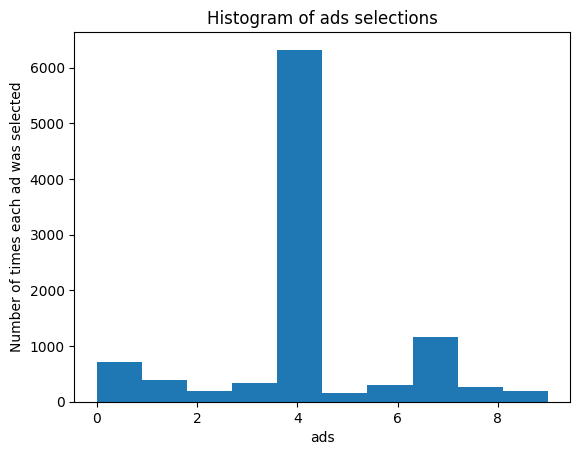

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was selected')
plt.show()